## Import all necessary libraries

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2024-04-09 23:16:44.706532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Function for graph to determine training and validation loss

In [ ]:
def loss_graph(history):
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch(s)')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Function for loading the image data

In [ ]:
def load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES):
    images = []
    labels = []

    # Loop through the folders
    for category in range (NUM_CATEGORIES):
        category_dir = os.path.join(data_dir, str(category))

        # Loop through images in the class folder
        for filename in os.listdir(category_dir):
            if filename.endswith(".ppm"):
                img_path = os.path.join(category_dir, filename)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
                images.append(img)
                labels.append(category)

    return (np.array(images), np.array(labels))

## Image pre processing

In [ ]:
data_dir = "gtsrb"
IMG_HEIGHT = 30
IMG_WIDTH = 30
NUM_CATEGORIES = 3

images, labels = load_data(data_dir, IMG_WIDTH, IMG_HEIGHT, NUM_CATEGORIES)

## Output the shape of the images

In [ ]:
print(images.shape)

## flatten each image to be a row vector of pixel values

In [21]:
reshaped_images = images.reshape(images.shape[0], -1)

## Print the reshaped image size

In [22]:
# This can be fed into the nn
# Input shape would be 2700
print(reshaped_images.shape)

(3150, 2700)


## Split the data into training, cross validation and test set (60:20:20) split

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(reshaped_images, labels, test_size=0.4, random_state=35)
#split test set 50:50 for the CV and test sets
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=35)

## Construction of the nueral network

In [24]:
model = Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2700,), kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(NUM_CATEGORIES, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                172864    
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 175043 (683.76 KB)
Trainable params: 175043 (683.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(X_train, y_train, validation_data=(X_cv, y_cv), epochs=40, batch_size=32)

Epoch 1/40
60/60 [==============================] - 1s 5ms/step - loss: 28.0539 - accuracy: 0.5132 - val_loss: 23.3033 - val_accuracy: 0.5032
Epoch 2/40
60/60 [==============================] - 0s 3ms/step - loss: 15.4712 - accuracy: 0.6063 - val_loss: 6.0859 - val_accuracy: 0.6333
Epoch 3/40
60/60 [==============================] - 0s 3ms/step - loss: 6.5686 - accuracy: 0.7111 - val_loss: 5.8681 - val_accuracy: 0.7587
Epoch 4/40
60/60 [==============================] - 0s 2ms/step - loss: 3.2488 - accuracy: 0.8090 - val_loss: 4.9825 - val_accuracy: 0.6825
Epoch 5/40
60/60 [==============================] - 0s 2ms/step - loss: 2.7809 - accuracy: 0.8085 - val_loss: 2.4092 - val_accuracy: 0.8524
Epoch 6/40
60/60 [==============================] - 0s 3ms/step - loss: 4.0789 - accuracy: 0.7677 - val_loss: 8.7901 - val_accuracy: 0.6127
Epoch 7/40
60/60 [==============================] - 0s 3ms/step - loss: 4.2822 - accuracy: 0.7831 - val_loss: 3.1585 - val_accuracy: 0.7730
Epoch 8/40
60/60 

In [27]:
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

60/60 [==============================] - 0s 1ms/step - loss: 0.7247 - accuracy: 0.9698
Test Loss: 0.7246977090835571, Test Accuracy: 0.9698412418365479


## Print trainign and validation loss graph

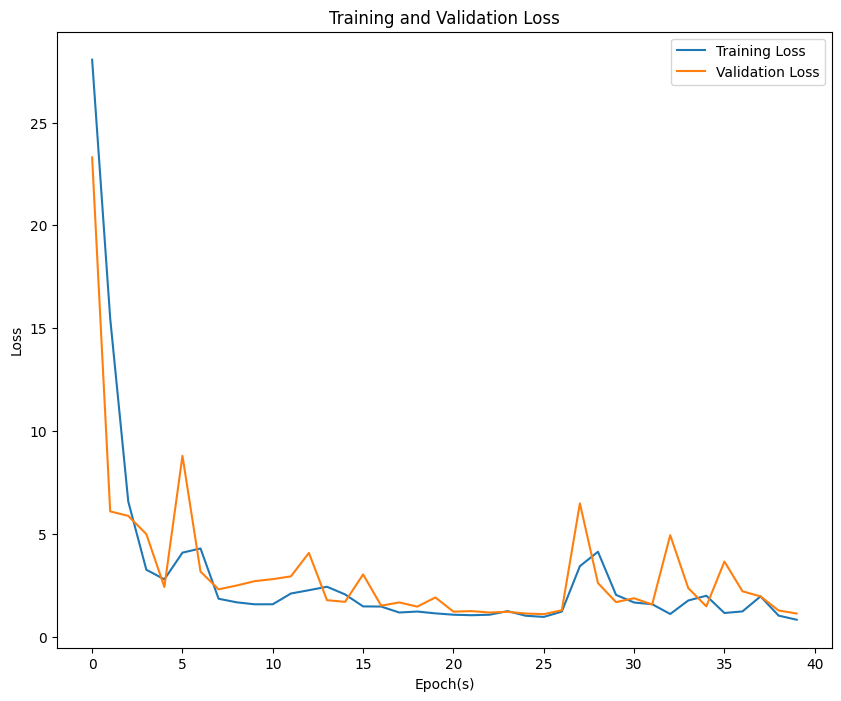

In [28]:
loss_graph(history)

## Print graph for the model accuracy

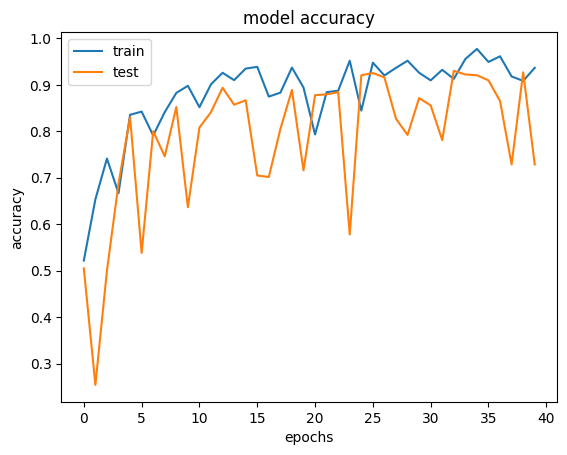

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Output visuals of the model predictions

60/60 [==============================] - 0s 1ms/step


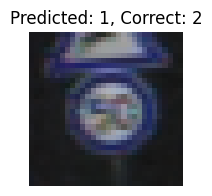

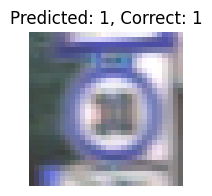

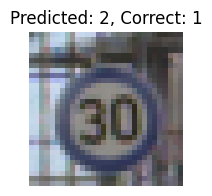

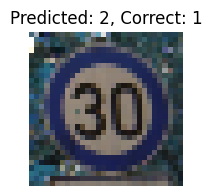

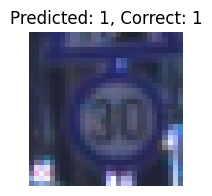

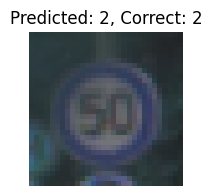

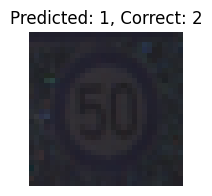

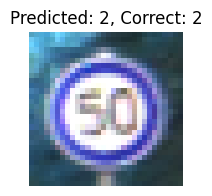

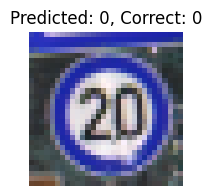

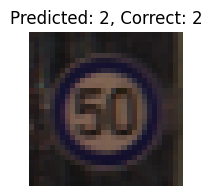

In [15]:
predictions = model.predict(X_train)

predicted_labels = np.argmax(predictions, axis=1)

num_samples_to_visualize = 10

for i in range(num_samples_to_visualize):
    plt.figure(figsize=(2, 2))
    # Reshape the images that were flattened previously
    plt.imshow(X_test[i].reshape(30, 30, 3))
    plt.title(f'Predicted: {predicted_labels[i]}, Correct: {y_test[i]}')
    plt.axis('off')
    plt.show()